In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import sys
from tqdm import tqdm
sys.path.insert(0, os.getcwd() + '/code')
from viz import *
from helper_functions import * 

In [3]:
df_game = pd.read_csv("data/games.csv")
df_tracking = pd.read_csv("data/week1.csv")
df_tracking = compute_orientation(df_tracking)
df_play = pd.read_csv("data/plays.csv")
df_players = pd.read_csv("data/players.csv")
df_pffScoutingData = pd.read_csv("data/pffScoutingData.csv")

In [25]:
animate_play(df_tracking,df_play,df_players,df_pffScoutingData, 2021091200, 122, displayZone=True, displayOrientations=False).show()

 PlayId : 1422 - (8:38) (Shotgun) B.Roethlisberger pass short right to J.Smith-Schuster to BUF 45 for 10 yards (J.Poyer).


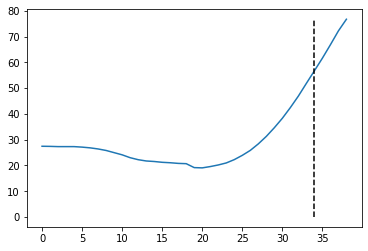

In [26]:
df_tracking = pd.read_csv("data/week1.csv")
gameId = 2021091201
playId = 1422

playIds = df_play[df_play.gameId==gameId].playId.unique()
playIds.sort()
for playId in [playId]:#playIds[:5]:
    selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()    
    tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()
    selected_tracking_df = beaten_by_defender(gameId, playId, df_pffScoutingData, selected_tracking_df, seuil = 0.5)


    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()
    if selected_play_df.empty :
        print(playId)
        continue
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    print(f" PlayId : {playId} - {playDescription}")
    aire_t = list()
    if 'pass_forward' in selected_tracking_df.event.unique():
        eventFrame = selected_tracking_df[selected_tracking_df.event == 'pass_forward'].iloc[0].frameId
    else :
        eventFrame = 1000
    for frameId in sorted_frame_list:
        #if eventFrame == frameId :
        #    break
        selected_frame_df = selected_tracking_df[selected_tracking_df.frameId == frameId]
        offensive_points = get_Oline_position(selected_frame_df)
        defensive_points = get_Dline_position(selected_frame_df)
        QB_zone = calculate_Oline_zones(offensive_points, line_of_scrimmage)
        region_polys, region_pts, players_points = calculate_voronoi_zones(QB_zone, offensive_points, defensive_points)
        aire_t.append(pocketArea(region_polys, region_pts, players_points))

    plt.plot(aire_t)
    plt.vlines(eventFrame, 0, np.max(aire_t), color = 'black', linestyles='--',)
    plt.show()
    

  0%|          | 0/97 [00:00<?, ?it/s]

 PlayId : 2279 - (1:11) (Shotgun) D.Prescott sacked at TB 33 for -12 yards (S.Barrett).


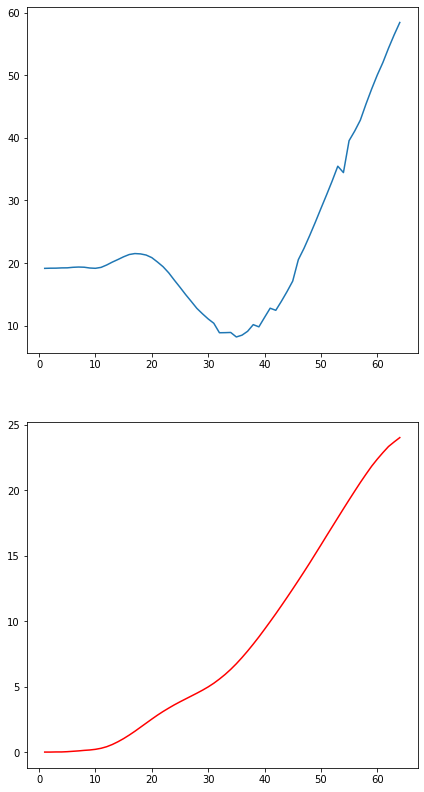

 45%|████▌     | 44/97 [00:08<00:10,  5.02it/s]

 PlayId : 2330 - (:28) (Shotgun) D.Prescott scrambles left end pushed ob at TB 42 for 1 yard (S.Barrett; W.Gholston). TB-W.Gholston was injured during the play. His return is Questionable. 


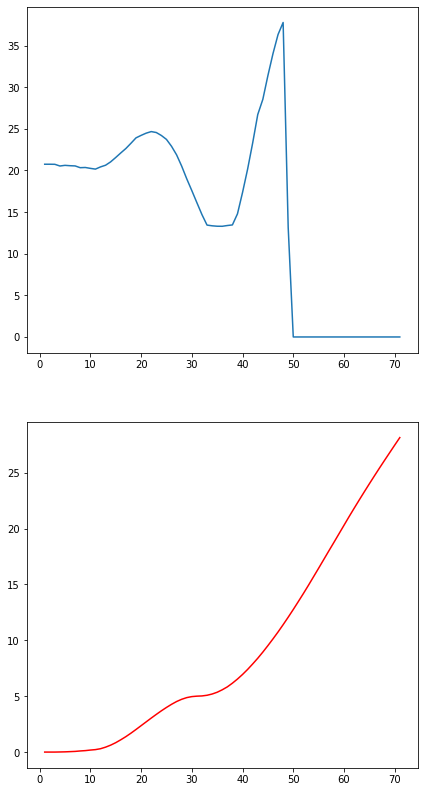

 47%|████▋     | 46/97 [00:17<00:22,  2.24it/s]

 PlayId : 3364 - (2:03) (Shotgun) D.Prescott scrambles up the middle to TB 25 for 2 yards (D.White).


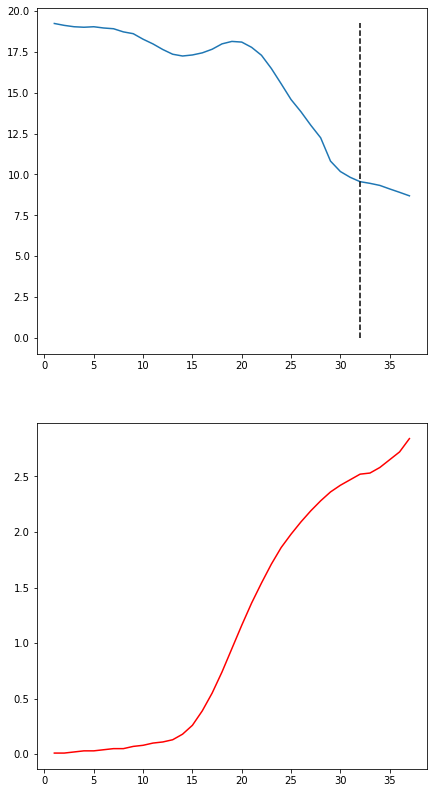

100%|██████████| 97/97 [00:23<00:00,  4.17it/s]


In [13]:
gameId = 2021090900

playIds = df_play[df_play.gameId==gameId].playId.unique()
playIds.sort()
for playId in tqdm(playIds):
    selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()  
    if 'SCRAMBLE' in selected_play_df.dropBackType.unique():  
        tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
        tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
        selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()
        selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()
        selected_tracking_df = beaten_by_defender(gameId, playId, df_pffScoutingData, selected_tracking_df, seuil = 0.5)

        sorted_frame_list = selected_tracking_df.frameId.unique()
        sorted_frame_list.sort()
        if selected_play_df.empty :
            print(playId)
            continue
        line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
        playDescription = selected_play_df.playDescription.values[0]
        print(f" PlayId : {playId} - {playDescription}")

        QB_dis_list = list(selected_tracking_df[selected_tracking_df.officialPosition == "QB"].dis)
        QB_dis_covered = [QB_dis_list[0]] + [np.sum(QB_dis_list[:k]) for k in range(1,len(QB_dis_list))]
        aire_t = list()

        for frameId in sorted_frame_list:
            #if eventFrame == frameId :
            #    break
            selected_frame_df = selected_tracking_df[selected_tracking_df.frameId == frameId]
            offensive_points = get_Oline_position(selected_frame_df)
            defensive_points = get_Dline_position(selected_frame_df)
            QB_zone = calculate_Oline_zones(offensive_points, line_of_scrimmage)
            region_polys, region_pts, players_points = calculate_voronoi_zones(QB_zone, offensive_points, defensive_points)
            aire_t.append(pocketArea(region_polys, region_pts, players_points))
        fig, ax = plt.subplots(2,1, t

In [ ]:
print(f'Total n° of plays : {len(df_play)}')
scramble_mask = "'SCRAMBLE' in dropBackType | 'SCRAMBLE_ROLLOUT_RIGHT' in dropBackType | 'SCRAMBLE_ROLLOUT_LEFT' in dropBackType"
scramble_plays = df_play.query(scramble_mask)#[["gameId","playId","dropBackType"]]
print(f'n° of scramble plays : {len(scramble_plays)}')
for scramble_id in tqdm(range(len(scramble_plays))):

    scramble_play = scramble_plays.iloc[scramble_id].playId
    scramble_game = scramble_plays.iloc[scramble_id].gameId

    selected_play_df = df_play[(df_play.playId==scramble_play)&(df_play.gameId==scramble_game)].copy()  
    tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==scramble_play)&(tracking_players_df.gameId==scramble_game)].copy()
    selected_tracking_df = beaten_by_defender(scramble_game, scramble_play , df_pffScoutingData, selected_tracking_df, seuil = 0.5)
    selected_tracking_df = scramble(scramble_game, scramble_play , df_pffScoutingData, selected_tracking_df, seuil = 0.5)
    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()
    if selected_play_df.empty :
        print(playId)
        continue
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    print(f" PlayId : {scramble_game} - {scramble_play} - {playDescription}")

    QB_dis_list = list(selected_tracking_df[selected_tracking_df.officialPosition == "QB"].dis)
    QB_dis_covered = [QB_dis_list[0]] + [np.sum(QB_dis_list[:k]) for k in range(1,len(QB_dis_list))]
    aire_t = list()

    for frameId in sorted_frame_list:
        #if eventFrame == frameId :
        #    break
        selected_frame_df = selected_tracking_df[selected_tracking_df.frameId == frameId]
        offensive_points = get_Oline_position(selected_frame_df)
        defensive_points = get_Dline_position(selected_frame_df)
        QB_zone = calculate_Oline_zones(offensive_points, line_of_scrimmage)
        region_polys, region_pts, players_points = calculate_voronoi_zones(QB_zone, offensive_points, defensive_points)
        aire_t.append(pocketArea(region_polys, region_pts, players_points))
    aire_min_during_scramble = np.min(aire_t)
    scramble_plays.loc[scramble_id, 'scrambleArea'] = aire_min_during_scramble
#print(scramble_plays[['gameId','playId','scrambleArea']])

    plt.plot(sorted_frame_list, aire_t)

    if 'pass_forward' in selected_tracking_df.event.unique():
        eventFrame = selected_tracking_df[selected_tracking_df.event == 'pass_forward'].iloc[0].frameId
        plt.vlines(eventFrame, 0, np.max(aire_t), color = 'black', linestyles='--',)
    else :
        eventFrame = 1000
    plt.show()


In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import sys
from tqdm import tqdm
sys.path.insert(0, os.getcwd() + '/code')
from viz import *
from helper_functions import * 
from multiprocessing import Pool
from scipy.signal import argrelextrema

df_game = pd.read_csv("data/games.csv")
df_tracking = pd.read_csv("data/week1.csv")
df_tracking = compute_orientation(df_tracking)
df_play = pd.read_csv("data/plays.csv")
df_players = pd.read_csv("data/players.csv")
df_pffScoutingData = pd.read_csv("data/pffScoutingData.csv")


def features_one_play(playId) : 
    gameId = df_area[df_area.playId == playId].gameId.unique()[0]
    print(f'{playId} - {gameId}')
    selected_area_df = df_area[(df_area.playId==playId)&(df_area.gameId==gameId)].copy() 
    selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()  
    tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()
    selected_tracking_df = beaten_by_defender(gameId, playId , df_pffScoutingData, selected_tracking_df, seuil = 0.5)
    #try :
    selected_tracking_df = scramble(gameId, playId, df_pffScoutingData, selected_tracking_df, seuil = 0.5)
    event, te, tsnap = compute_t_event(gameId, playId, selected_play_df, df_pffScoutingData, selected_tracking_df)
    print(tsnap,te)
    Ae = selected_area_df[selected_area_df.frameId == te].Area.iloc[0]
    print(np.array(selected_area_df[(selected_area_df.frameId > tsnap)&(selected_area_df.frameId < te)].Area.values.tolist()))
    t_extrema = argrelextrema(np.array(selected_area_df[(selected_area_df.frameId > tsnap)&(selected_area_df.frameId< te)].Area.values.tolist()), np.greater)[0]
    print(t_extrema)
    if len(t_extrema) > 0 :
        print('local maxima found')
        tc = t_extrema[-1] + 1 
        print(tc)
        Ac = selected_area_df[selected_area_df.frameId == tc + tsnap].Area.iloc[0]
        print(Ac)
    else :
        print('global max found')
        Ac = np.max(selected_area_df[(selected_area_df.frameId > tsnap) & (selected_area_df.frameId < te)].Area)
        tc = selected_area_df[selected_area_df.Area == Ac].frameId.iloc[0] - tsnap
    te = te - tsnap
    one_play =  pd.DataFrame([[playId, gameId, event, te, Ae, tc, Ac, tsnap]], 
                            columns = ['playId', 'gameId', 'event', 'te', 'Ae', 'tc', 'Ac', 'tsnap'])
        #one_play.to_csv(f'data/area_features/plays/play{playId}_game{gameId}.csv')
        #return one_play
    #except : 
    #        print('Problème pour gameId, playId : ' + str((gameId, playId)))

    return one_play

df_tracking = pd.read_csv(f"data/week{1}.csv")
df_area = pd.read_csv(f"data/area/week{1}.csv")
playIds = [500]#df_area.playId.unique()

with Pool() as mp_pool:
    week_features = mp_pool.map(features_one_play, playIds)
print(week_features)


500 - 2021091201
5 27
[43.79175    44.57015    44.8398     44.8179     44.252      42.88095
 40.9761     38.45865    35.81235    33.12945    29.19857119 27.67265
 25.52225    25.4776     27.01165    28.588      29.9839     31.22625
 32.24555    34.30705    36.47345   ]
[2]
local maxima found
3
44.83980000000003
[   playId      gameId     event  te        Ae  tc       Ac  tsnap
0     500  2021091201  scramble  22  39.06245   3  44.8398      5]


In [13]:
df_area_1 = pd.read_csv(f"data/area/week{1}.csv")
df_area_2 = pd.read_csv(f"data/area/week{2}.csv")
df_area_3 = pd.read_csv(f"data/area/week{3}.csv")
df_area_4 = pd.read_csv(f"data/area/week{4}.csv")
df_area_5 = pd.read_csv(f"data/area/week{5}.csv")
df_area_6 = pd.read_csv(f"data/area/week{6}.csv")
df_area_7 = pd.read_csv(f"data/area/week{7}.csv")
df_area_8 = pd.read_csv(f"data/area/week{8}.csv")
print(len(df_area_1)+len(df_area_2)+len(df_area_3)+len(df_area_4)+len(df_area_5)+len(df_area_6)+len(df_area_7)+len(df_area_8))
print(df_area_1)
df_area_all_weeks = pd.concat([df_area_1,
                            df_area_2,
                            df_area_3,
                            df_area_4,
                            df_area_5,
                            df_area_6,
                            df_area_7,
                            df_area_8])

print(len(df_area_all_weeks))
print(df_area_all_weeks)
df_area_all_weeks.to_csv('data/area/area_t.csv')

361370
       Unnamed: 0  frameId       Area  playId      gameId
0               0        1  22.319900      97  2021090900
1               0        2  22.162750      97  2021090900
2               0        3  22.160150      97  2021090900
3               0        4  22.453350      97  2021090900
4               0        5  22.727850      97  2021090900
...           ...      ...        ...     ...         ...
48581           0       30  26.358933    4845  2021091300
48582           0       31  25.956274    4845  2021091300
48583           0       32  26.037736    4845  2021091300
48584           0       33  24.388550    4845  2021091300
48585           0       34  18.450469    4845  2021091300

[48586 rows x 5 columns]
361370
       Unnamed: 0  frameId       Area  playId      gameId
0               0        1  22.319900      97  2021090900
1               0        2  22.162750      97  2021090900
2               0        3  22.160150      97  2021090900
3               0        4  22.4

In [18]:
list_all_tracking = []
for i in range(1,8):
    list_all_tracking.append(pd.read_csv(f"data/week{i}.csv"))
df_all_tracking = pd.concat(list_all_tracking)

list_play_duration = []
for gameId in tqdm(df_play.gameId.unique()):
    playIds = df_play[df_play.gameId==gameId].playId.unique()
    playIds.sort()
    for playId in playIds:
        selected_tracking_df = df_all_tracking[(df_all_tracking.playId==playId)&(df_all_tracking.gameId==gameId)].copy()
        list_play_duration.append(np.max(selected_tracking_df.frameId))


100%|██████████| 122/122 [03:55<00:00,  1.93s/it]


8557
29


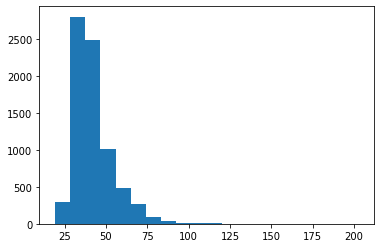

In [24]:
print(len(list_play_duration))
plt.hist(list_play_duration, bins=20)
plt.plot()
print(len(np.where(np.array(list_play_duration) > 100)[0]))